In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
import math

## Hypothesis Testing

In this notebook we'll do some basic hypothesis testing based on a set of coin flips as data. The question to answer is: Given how often a coin flip is predicted, how sure can we be that the predictor is actually able to predict the coin flips.

**Null** => Not special, the predictor can't predict coin flips.

**Alternative** => The predictor is able to predict coin flips.

We'll use 100 coin flips and an assumption of a fair coin ($P(H) = 0.5$ and $P(T) = 0.5$).
If the null hypothesis is true, this will give a distribution of `Binom(100, 0.5)`

In [13]:
from scipy.stats import binom
N = 100
p = 0.5

# If the predictor correctly predicts 56/100 flips correctly, how often would we expect to see this over repeated trials?
# For this we can use the CDF (cumulative distribution function)
prob = 1 - binom.cdf(56, N, p)

print(str(round(prob*100, 1))+"%")

9.7%


In this case, the value is greater than the usual 5% cutoff, so we can accept the null hypothesis in this case.

To find out how many flips need to be correctly predicted before we can reject the null hypothesis for a given p-value, we can use the inverse of the cumulative distribution function, the PPF (percent point function).

In [ ]:
p_value = 0.95
n = binom.ppf(p_value, N, p) + 1
print(f"To be able to reject the null. hypothesis for p={p_value}, we need at least {int(n)} flips correctly predicted.")

To be able to reject the null. hypothesis for p=0.95, we need at least 58 flips correctly predicted.


## Adding specificity to our hypotheses

Now the predictor says: "I can predict with 60% accuracy whether a flip will be heads or tails." In this case we have two competing hypotheses:

**H_0** => (same as before) No predictive power\
**H_1** => 60% predictive power

Essentially the case is the same as before, but now there may be overlap between the two distributions, while before we only had a singly distribution which decided: \
**predictive power => yes/no**

The two distributions are assumed to be normal, around 50 and 60. Since we are scaling a standard normal distribution from [$\mu$=0, $\sigma$=1] by a factor 10 to the range 

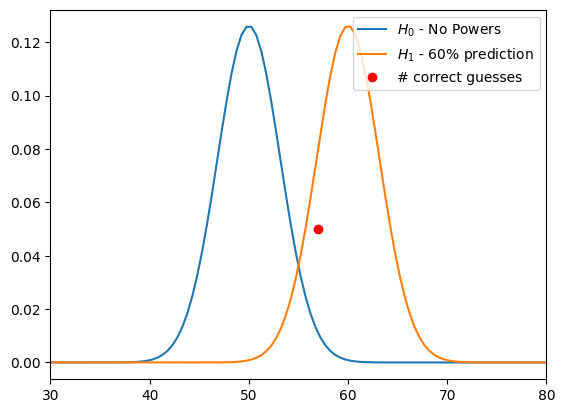

In [29]:
mu_0 = 50
mu_1 = 60
variance = 10 # Variance chosen here as 10 for demonstartion purposes
# Usually the binomial distribution should have a variance of Var(X) = n*p*(1-p) = 25 (for 50-50 probability)
sigma = math.sqrt(variance)

xs = np.linspace(1, 100, 200) # [1, 100] in 200 steps
ys_0 = stats.norm.pdf(xs, mu_0, sigma)
ys_1 = stats.norm.pdf(xs, mu_1, sigma)

plt.plot(xs, ys_0, label="$H_0$ - No Powers")
plt.plot(xs, ys_1, label="$H_1$ - 60% prediction")
plt.plot([57], [0.05], 'ro', label="# correct guesses")
plt.xlim(30, 80)
plt.legend();

For a total correct number of guesses of 57, the observation falls within the 95% CI of both distributions. So we have no reason to reject or accept either hypothesis on the basis of this data.

In [23]:
print(f"{1 - binom.cdf(57, 100, 0.5):.2f}")
print(f"{binom.cdf(57, 100, 0.6):.2f}")

0.07
0.30


So what can we do? We can decrease the CI by requiring fewer correct guesses, but this is prone to bias since we are choosing our statistics based on the data itself. But biasing equally is not always the solution, a proper analysis can give insight into how large the probability of Type I and Type II errors is with biased hypotheses. This tradeoff might be worth it.

Another option is to increase the sample size, which will greatly reduce the ratio between the variance (width) of the hypothesis curves and the number of observations. Therefore we remove the overlap and have more statistical certainty.

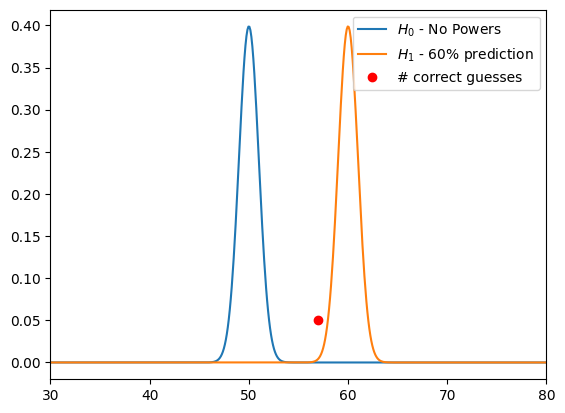

In [36]:
mu_0 = 50
mu_1 = 60
variance = 1 # Artificially making the variance smaller is the same as increasing the amount of datapoints
# Usually the binomial distribution should have a variance of Var(X) = n*p*(1-p) = 25 (for 50-50 probability)
sigma = math.sqrt(variance)

xs = np.linspace(1, 100, 1000) # [1, 100] in 1000 steps (more needed otherwise the normal curves look weird)
ys_0 = stats.norm.pdf(xs, mu_0, sigma)
ys_1 = stats.norm.pdf(xs, mu_1, sigma)

plt.plot(xs, ys_0, label="$H_0$ - No Powers")
plt.plot(xs, ys_1, label="$H_1$ - 60% prediction")
plt.plot([57], [0.05], 'ro', label="# correct guesses")
plt.xlim(30, 80)
plt.legend();

When we now have a correct number of guesses, the certainty is as follows:

In [39]:
print (1-binom.cdf(550, 1000, 0.5))
print (binom.cdf(550, 1000, 0.6))

0.0006958707972110068
0.0007412028990060172


Since we predicted significantly lower than 60% in this case, but significantly higher than 50%, we have to reject "H_1", but we can't accept the null hypothesis either. 